<a href="https://colab.research.google.com/github/Husayn01/ML_Projects/blob/main/Student_Score_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

Column Name | Description
Hours | Number of hours a student studied. This is the independent variable (feature).
Scores | The score that student achieved in a test. This is the dependent variable (target/output)

In [8]:
data = {
    'Hours': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7,
              7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4],
    'Scores': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25,
               85, 62, 41, 42, 17, 95, 30, 24, 67, 69]
}
df = pd.DataFrame(data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   20 non-null     float64
 1   Scores  20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 452.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,20.000000,20.000000
mean,4.965000,50.300000
std,2.663451,25.941432
min,1.100000,17.000000
25%,2.650000,26.500000
50%,4.800000,44.500000
75%,7.475000,70.500000
max,9.200000,95.000000


In [14]:
fig = px.histogram(df, x="Hours", marginal="box", nbins=10, title="Distribution of Study Hours")
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(df, x="Scores", marginal="box", nbins=10, title="Distribution of Scores")
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig = px.scatter(df, x="Hours", y="Scores", title="Hours vs Scores")
fig.show()

In [26]:
correlation = df.corr()
correlation

,Hours,Scores
Hours,1.000000,0.977474
Scores,0.977474,1.000000


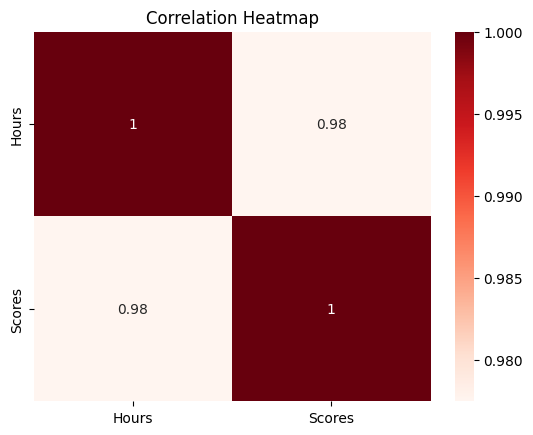

In [30]:
sns.heatmap(correlation, annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

Target Var = Score

input Var = Hours

In [57]:
# Linear Model = y = wx + b
# W = Slope, b = Intercept
def linear_model(w, x, b):
    return w * x + b

In [58]:
w = 10
b = 0
x = df['Hours']
y = df['Scores']
y_pred =  linear_model(w, x, b)
fig = px.scatter(df, x="Hours", y="Scores", title="Hours vs Scores")
fig.add_scatter(x=x, y=y_pred, mode='lines', name='Linear Model')
fig.show()

In [59]:
def try_params(w, b):
    y_pred =  linear_model(w, x, b)
    fig = px.scatter(df, x="Hours", y="Scores", title="Hours vs Scores")
    fig.add_scatter(x=x, y=y_pred, mode='lines', name='Linear Model')
    fig.show()

In [60]:
try_params(30, 0)

In [61]:
try_params(10, 10)

In [63]:
def loss(y, y_pred):
    return np.mean((y - y_pred)**2)

In [56]:
loss(y, y_pred)

np.float64(30.45)

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

LinearRegression()

In [65]:
model.predict(x.values.reshape(-1, 1))

array([26.83224828, 51.58525212, 33.49651854, 83.95456485, 36.35263437,
       17.31186218, 90.61883511, 55.39340656, 82.05048763, 28.73632549,
       76.33825597, 59.201561  , 45.87302047, 34.44855715, 13.50370774,
       87.76271928, 26.83224828, 21.12001662, 61.10563822, 73.48214014])

In [75]:
fig = px.scatter(df, x="Hours", y="Scores", title="Hours vs Scores")
fig.add_scatter(x=x, y=model.predict(x.values.reshape(-1, 1)), mode='lines', name='Linear Model')
fig.show()

In [67]:
model.coef_

array([9.52038609])

In [68]:
model.intercept_

np.float64(3.0312830386057854)

In [77]:
loss(y, model.predict(x.values.reshape(-1, 1)))

np.float64(28.47726795538095)

In [70]:
accuracy = model.score(x.values.reshape(-1, 1), y)
accuracy

0.9554562450839484

In [78]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 5.34


In [79]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y, y_pred)
print(f"MAE: {mae:.2f}")


MAE: 4.90


Final weight (w): 9.54930773921097
Final bias (b): 2.849649970703918


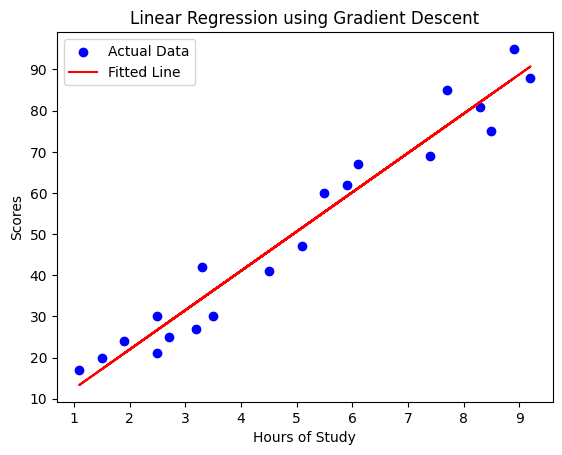

In [80]:
alpha = 0.01  # learning rate
iterations = 1000  # number of iterations
m = len(x)  # number of data points

# Initialize parameters
w = 0  # initial weight (slope)
b = 0  # initial bias (intercept)

# Gradient Descent
for _ in range(iterations):
    # Predictions
    y_pred = w * x + b

    # Compute the gradients
    dw = (1/m) * np.sum((y_pred - y) * x)  # Gradient for w
    db = (1/m) * np.sum(y_pred - y)  # Gradient for b

    # Update parameters
    w -= alpha * dw
    b -= alpha * db

# Final model parameters after gradient descent
print(f"Final weight (w): {w}")
print(f"Final bias (b): {b}")

# Plotting the data and the fitted line
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, w*x + b, color='red', label='Fitted Line')

plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print(f"R² (from sklearn): {r2:.4f}")


R² (from sklearn): 0.9554
